In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# 2. ROC, PR 곡선 그리기

In [3]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import train_test_split

In [4]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

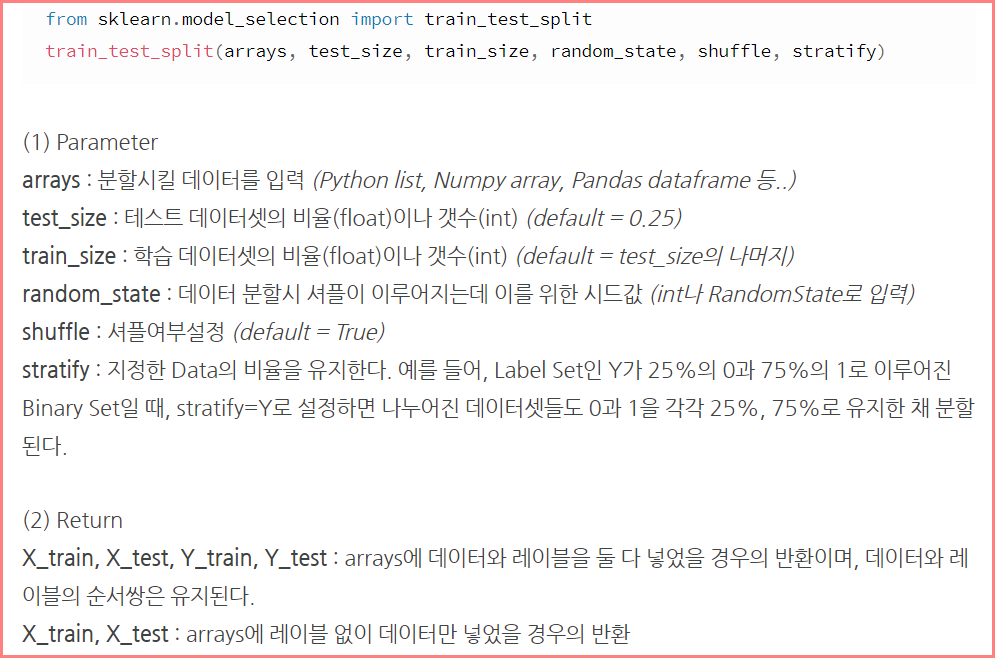

In [6]:
#LogisticRegrssion 객체 생성
model = LogisticRegression()

#학습 수행
model2 = model.fit(X_train,y_train)

# 판별함수 결과값 계산
y_score = model2.decision_function(X_test)


# predict(): y_score가 양수이면 y=1, 음수이면 y=0으로 분류
y_pred = model2.predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
# calculate AUC
roc_auc = roc_auc_score(y_test, y_score)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [8]:
print(roc_auc)

0.9651639344262295


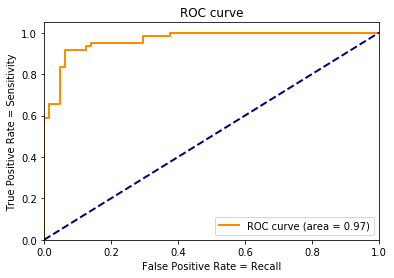

In [9]:
plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()